## DATA CLEANING

#### Sebastian Endara 323096

## Observacion de los datos

In [9]:
import pandas as pd


# Load the data from the CSV file

data_path = 'nyc_taxi_hw.csv'
nyc_taxi_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
nyc_taxi_data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### LIMPIEZA DE DATOS:

Para la limpieza de datos, se procedera a:
-   Eliminar columna Unnamed:0
-   Eliminar tambien la columna KEY, porque no proporciona informacion alguna, ya que pickup_datetime nos proporcina la fecha y hora de cuando se recogio al pasajero y el identificador que tiene despues de esa fecha la columna key, no es unico ya que se repite entre las filas, por lo tanto, tambien se elimina esa columna.
-   Examinar si no hay valores nulos en la tabla, en caso que si haya se eliminaran.
-   Revisar valores atipicos, en tarifas, coordenadas y numero de pasajeros

In [10]:
# Remove the unnecessary 'Unnamed: 0' column
nyc_taxi_data.drop(columns=['Unnamed: 0'], inplace=True)

# Remove key column 
nyc_taxi_data.drop(columns=['key'], inplace=True)

# Check for missing values
missing_values = nyc_taxi_data.isnull().sum()

# Summary statistics for numerical columns to check for outliers
summary_statistics = nyc_taxi_data.describe()

missing_values, summary_statistics


(fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64,
          fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
 count  100000.000000     100000.000000    100000.000000      100000.000000   
 mean       11.354652        -72.494682        39.914481         -72.490967   
 std         9.716777         10.693934         6.225686          10.471386   
 min       -44.900000       -736.550000       -74.007670         -84.654241   
 25%         6.000000        -73.992041        40.734996         -73.991215   
 50%         8.500000        -73.981789        40.752765         -73.980000   
 75%        12.500000        -73.966982        40.767258         -73.963433   
 max       200.000000         40.787575       401.083332          40.851027   
 
        dropoff_latitude  passenger_count  
 count     100000.000000    100000.000000  
 mean          3

Hay valores negativos y un valor máximo bastante alto, lo que podría indicar valores atípicos, en tarifa.
Hay ceros en cuenta de pasajeros. Tambien hay valores atipicos en las coordenadas de recogidas y donde se deja a los pasajeros.

In [11]:
#Remove negative values or zero from the 'fare_amount' and 'passenger_count' columns
nyc_taxi_data = nyc_taxi_data[(nyc_taxi_data['fare_amount'] > 0) & (nyc_taxi_data['passenger_count'] > 0)]

#Remove outliers from the 'fare_amount' column
nyc_taxi_data = nyc_taxi_data[nyc_taxi_data['fare_amount'] < 100]

#Boundaries for latitude and longitude NYC coordinates
nyc_lat_boundaries = (40.477399, 45.01585)
nyc_long_boundaries = (-79.76259, -71.18577)

#Remove outliers from the 'pickup_latitude' and 'dropoff_latitude' columns
nyc_taxi_data = nyc_taxi_data[(nyc_taxi_data['pickup_latitude'] >= nyc_lat_boundaries[0]) & (nyc_taxi_data['pickup_latitude'] <= nyc_lat_boundaries[1])]
nyc_taxi_data = nyc_taxi_data[(nyc_taxi_data['dropoff_latitude'] >= nyc_lat_boundaries[0]) & (nyc_taxi_data['dropoff_latitude'] <= nyc_lat_boundaries[1])]
#Remove outliers from the 'pickup_longitude' and 'dropoff_longitude' columns
nyc_taxi_data = nyc_taxi_data[(nyc_taxi_data['pickup_longitude'] >= nyc_long_boundaries[0]) & (nyc_taxi_data['pickup_longitude'] <= nyc_long_boundaries[1])]
nyc_taxi_data = nyc_taxi_data[(nyc_taxi_data['dropoff_longitude'] >= nyc_long_boundaries[0]) & (nyc_taxi_data['dropoff_longitude'] <= nyc_long_boundaries[1])]



#Display the first few rows of the dataset
nyc_taxi_data.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Se eliminaron los negativos y los valores atípicos de la columna 'fare_amount','passenger_count' y 'coordinates'.

In [12]:
# Summary statistics for numerical columns to check for outliers
summary_statistics = nyc_taxi_data.describe()
summary_statistics

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97476.000000,97476.000000,97476.000000,97476.000000,97476.000000,97476.000000
mean,11.302600,-73.975180,40.751275,-73.973992,40.751629,1.680629
std,9.362367,0.042752,0.032293,0.038616,0.034443,1.298752
min,0.010000,-78.083332,40.509960,-75.354559,40.484335,1.000000
25%,6.000000,-73.992264,40.736675,-73.991391,40.735780,1.000000
50%,8.500000,-73.982077,40.753540,-73.980437,40.753967,1.000000
75%,12.500000,-73.968306,40.767678,-73.965143,40.768473,2.000000
max,98.750000,-72.856968,43.183332,-72.854940,43.415190,6.000000


Se observa ya una mejor consistencias en las estadisticas de los datos.

## Modificar los datos:

A partir de un corto analisis, se determino que se puede trabajar en las siguientes características adicionales para el conjunto de datos:

    -    Hora del día y día de la semana: Se extraera la hora del día y el día de la semana del pickup_datetime. Esto nos permitirá ver cómo varían las tarifas dependiendo de la hora y el día, lo cual es útil para entender los patrones de demanda.
    -    Distancia al centro de la ciudad: Se calculara la distancia desde el punto de recogida y el punto de destino hasta un punto central en Nueva York (como Times Square), que puede ser un indicador de la tarifa debido a la alta demanda en áreas centrales.
    -    Distancia con formula de Haversine entre los puntos de recogida y destino: Se calculara la distancia entre dos puntos geográficos dados, que se utilizan para determinar la longitud del viaje en kilómetros

In [13]:
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime

# Define the coordinates for Times Square, a central point in NYC
times_square_coords = (40.7580, -73.9855)

def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
# Apply the haversine function to calculate distances
nyc_taxi_data['trip_distance_km'] = nyc_taxi_data.apply(
    lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                   row['dropoff_latitude'], row['dropoff_longitude']),
    axis=1
)


# Function to calculate the distance to Times Square
def distance_to_times_square(lat, lon):
    return haversine_distance(lat, lon, times_square_coords[0], times_square_coords[1])

# Convert 'pickup_datetime' from string to datetime
nyc_taxi_data['pickup_datetime'] = pd.to_datetime(nyc_taxi_data['pickup_datetime'])

# Extract hour of day and day of week
nyc_taxi_data['pickup_hour'] = nyc_taxi_data['pickup_datetime'].dt.hour
nyc_taxi_data['day_of_week'] = nyc_taxi_data['pickup_datetime'].dt.day_name()

# Calculate the distance from pickup and dropoff locations to Times Square
nyc_taxi_data['distance_to_times_square_pickup'] = nyc_taxi_data.apply(
    lambda row: distance_to_times_square(row['pickup_latitude'], row['pickup_longitude']),
    axis=1
)
nyc_taxi_data['distance_to_times_square_dropoff'] = nyc_taxi_data.apply(
    lambda row: distance_to_times_square(row['dropoff_latitude'], row['dropoff_longitude']),
    axis=1
)

# Show the updated dataframe with new columns
nyc_taxi_data.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,pickup_hour,day_of_week,distance_to_times_square_pickup,distance_to_times_square_dropoff
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,Monday,12.575088,13.146477
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,Tuesday,5.795393,2.720228
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,Thursday,0.431656,0.958107
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,Saturday,2.767381,0.511109
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,Tuesday,1.840427,3.755836


## Explorar Datos


Se procedera a visualizar los datos de la siguiente forma:

    -   Distribucion de tarifas y distancias: Visualizar la distribución de las tarifas y las distancias de los viajes para entender la variabilidad y los rangos tipicos.

    -   Relacion entre tarifa y distancia: Un diagrama de dispersion para explorar como la tarifa se relaciona con la distancia del viaje podria ser muy revelador.

    -   Influencia de la hora del dia y el dia de la semana en las tarifas: utilizar graficos de caja para ver cómo las tarifas varian a lo largo de diferentes horas del dia y dias de la semana.

    -   Distancia al centro de la ciudad y tarifa: Podemos examinar si hay una relacion entre la distancia al centro de la ciudad desde el punto de recogida o destino y la tarifa del viaje.

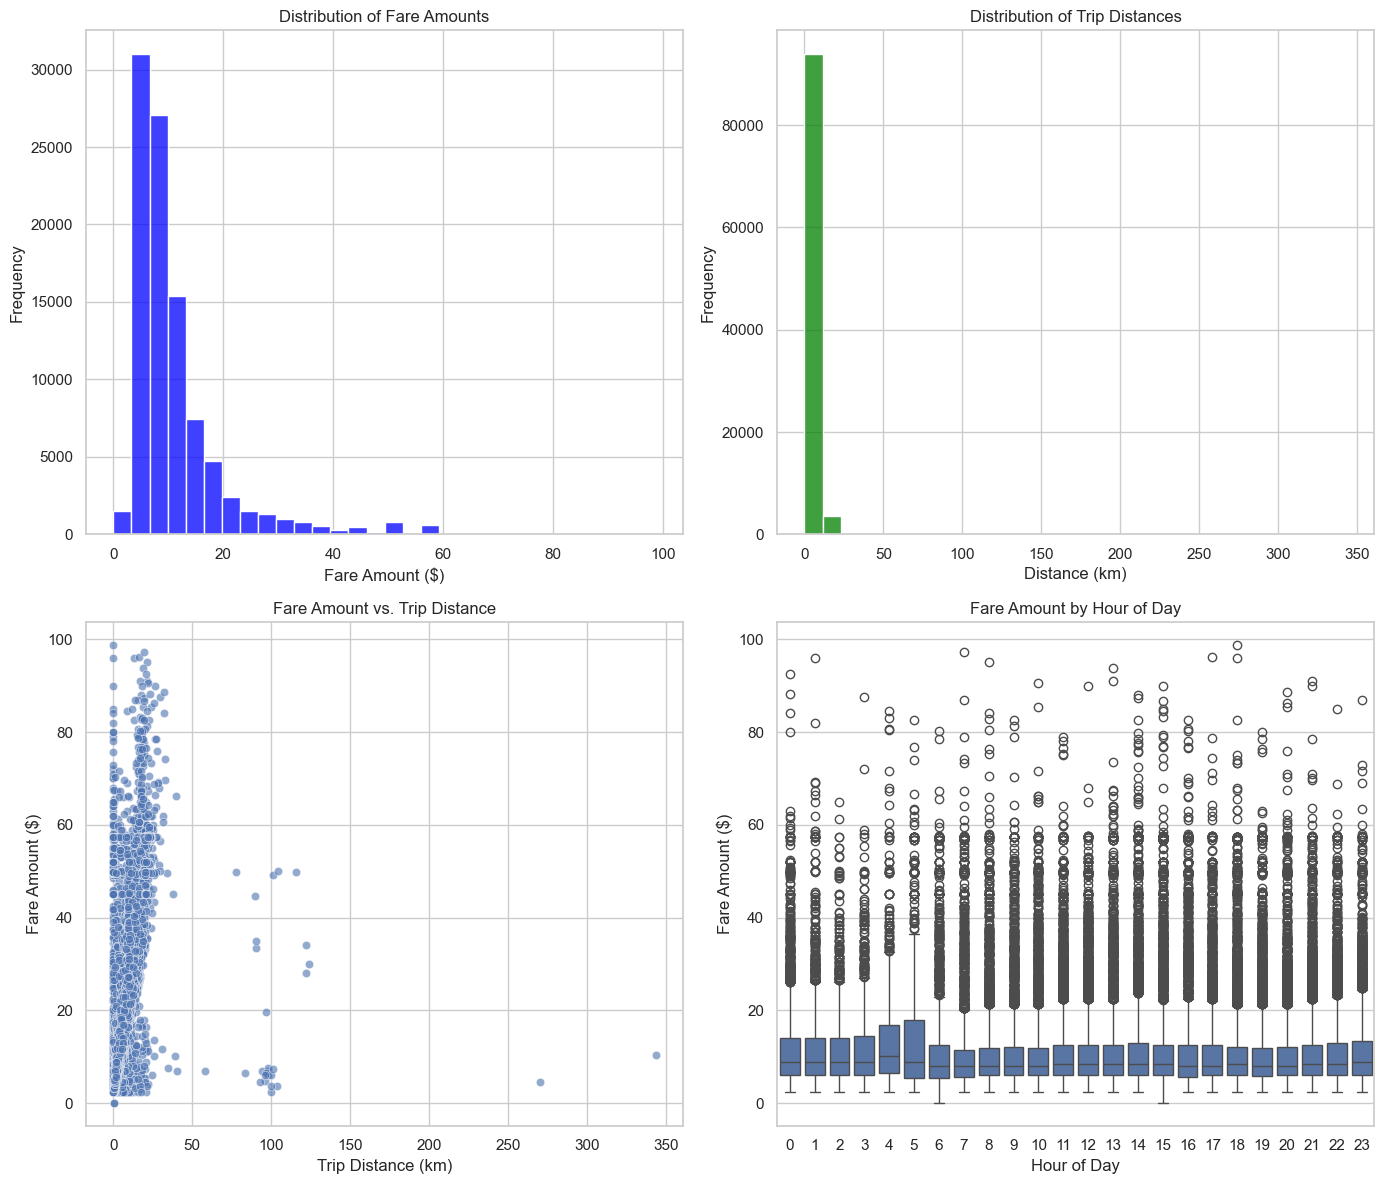

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Distribution of fare amounts
sns.histplot(nyc_taxi_data['fare_amount'], bins=30, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Fare Amounts')
axes[0, 0].set_xlabel('Fare Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# Distribution of trip distances
sns.histplot(nyc_taxi_data['trip_distance_km'], bins=30, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Trip Distances')
axes[0, 1].set_xlabel('Distance (km)')
axes[0, 1].set_ylabel('Frequency')

# Fare amount vs. Trip distance
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=nyc_taxi_data, ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Fare Amount vs. Trip Distance')
axes[1, 0].set_xlabel('Trip Distance (km)')
axes[1, 0].set_ylabel('Fare Amount ($)')

# Fare amount by hour of day
sns.boxplot(x='pickup_hour', y='fare_amount', data=nyc_taxi_data, ax=axes[1, 1])
axes[1, 1].set_title('Fare Amount by Hour of Day')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()


-   Distribucion de las tarifas de los viajes: La mayoria de las tarifas se concentran en el rango de $0 a $20, con un pico alrededor de $6 a $10. Esto indica que la mayoria de los viajes son relativamente cortos o estan dentro de una tarifa estandar.

-   Distribucion de las distancias de los viajes: La distancia de los viajes muestra una concentracion en viajes cortos, con la mayoria de los viajes siendo de menos de 10 km. Esto es consistente con el ambiente urbano de NYC donde los destinos suelen estar relativamente cerca.

-   Relacion entre la tarifa y la distancia del viaje: Hay una relacion positiva general entre la distancia del viaje y la tarifa. Esto es esperado, ya que viajes mas largos suelen costar mas. Sin embargo, tambien se observa cierta dispersion, lo que podria indicar variaciones en tarifas debido a factores como el trafico o tarifas dinamicas.

-   Tarifa del viaje por hora del dia: La variabilidad de las tarifas cambia a lo largo del dia, con ciertas horas mostrando una mayor dispersion. Esto podria indicar un aumento en las tarifas debido a la demanda alta o tarifas nocturnas. Las tarifas parecen ser mas altas y mas variables durante la noche y temprano en la mañana, lo que podria reflejar una tarifa nocturna o menor disponibilidad de taxis.

## Regresion Lineal

Valor a predecir Fare_amount:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


# Preparing the data
X = nyc_taxi_data[['trip_distance_km', 'pickup_hour', 'day_of_week', 'distance_to_times_square_pickup']]
y = nyc_taxi_data['fare_amount']

# Convert 'day_of_week' into dummy variables
column_transformer = ColumnTransformer([
    ('day_of_week', OneHotEncoder(), ['day_of_week'])
], remainder='passthrough')

# Create a pipeline with transformation and linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)
# Display the metrics
mse
print('R^2:', r2)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)




R^2: 0.6589424414483487
Mean Absolute Error: 2.9234320730804955
Root Mean Squared Error: 5.475484700024606



    El R² es una medida de cuan bien las variaciones futuras estan siendo explicadas por el modelo. Un R² de 0.65 indica que aproximadamente el 65% de la variabilidad en la tarifa de los taxis se puede explicar por las variables utilizadas en el modelo.

    MAE (2.92): Esto significa que, en promedio, las predicciones del modelo se desvían aproximadamente $2.92 del valor real. Es una metrica util porque, al igual que RMSE, da una idea de la magnitud de los errores, pero es menos sensible a los valores atipicos.

    RMSE (5.47): Al igual que el MSE, pero en la misma unidad de las tarifas. Esta métrica es mas sensible a los valores atipicos que el MAE, lo que significa que grandes errores influyen más en el RMSE. Un RMSE de 3.23 indica que, en promedio, los errores de prediccion son de aproximadamente $5.47.